In [2]:
#Import libraries

import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick
import scikitplot as skplt

import seaborn as sns

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from collections import Counter

In [3]:
data = pd.read_csv('BankChurn.csv')
data.head().style

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.000000,1,1,1,101348.880000,1
1,15647311,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000,0
2,15619304,502,France,Female,42,8,159660.800000,3,1,0,113931.570000,1
3,15701354,699,France,Female,39,1,0.000000,2,0,0,93826.630000,0
4,15737888,850,Spain,Female,43,2,125510.820000,1,1,1,79084.100000,0


In [4]:
data.shape

(10000, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
data.describe().round()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,15690941.0,651.0,39.0,5.0,76486.0,2.0,1.0,1.0,100090.0,0.0
std,71936.0,97.0,10.0,3.0,62397.0,1.0,0.0,0.0,57510.0,0.0
min,15565701.0,350.0,18.0,0.0,0.0,1.0,0.0,0.0,12.0,0.0
25%,15628528.0,584.0,32.0,3.0,0.0,1.0,0.0,0.0,51002.0,0.0
50%,15690738.0,652.0,37.0,5.0,97199.0,1.0,1.0,1.0,100194.0,0.0
75%,15753234.0,718.0,44.0,7.0,127644.0,2.0,1.0,1.0,149388.0,0.0
max,15815690.0,850.0,92.0,10.0,250898.0,4.0,1.0,1.0,199992.0,1.0


In [7]:
data.corr().style

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:>

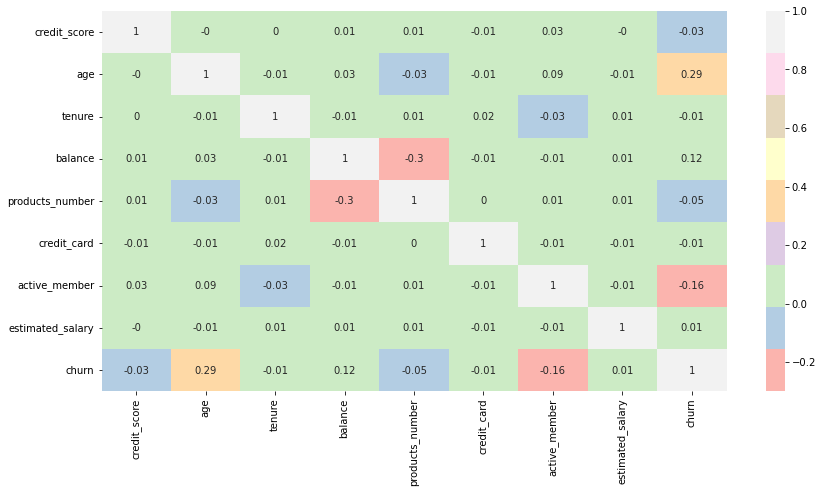

In [8]:
#DESCRIPTIVE ANALYTICS

#First we draw a correlation heatmap of all variables

data.drop('customer_id', axis = 1, inplace = True)
correlation = data.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'Pastel1')

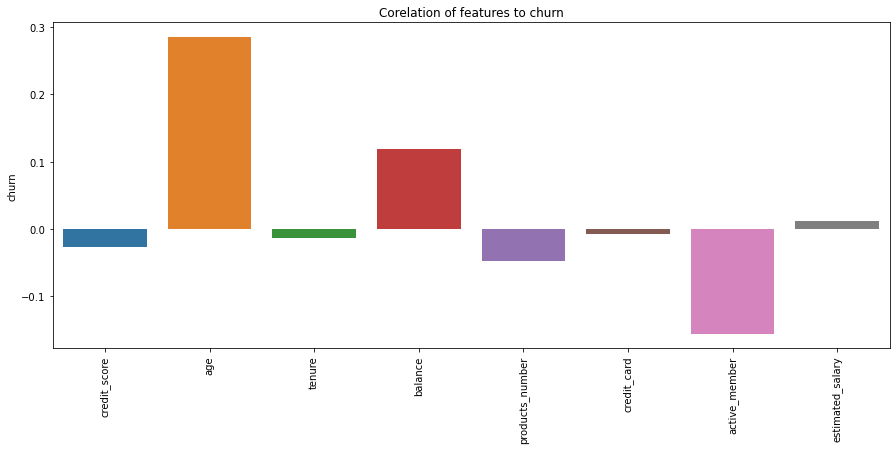

In [9]:
#We look into the correlations between churn and other variables in more depth
corr = data.corr().churn
plt.figure(figsize = (15,6))
sns.barplot(x = corr[:-1].index, y = corr[:-1])
plt.title("Corelation of features to churn")
plt.xticks(rotation=90);

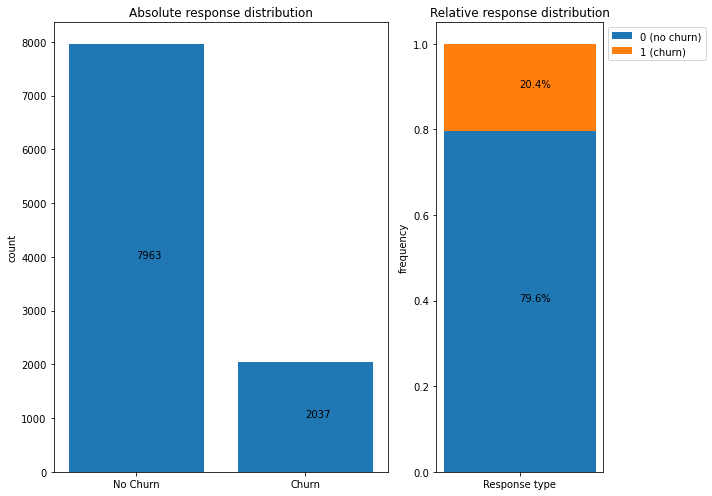

In [10]:
#Exploratory Data Analytics and Visualizations

# plot churn rate
keys, counts = np.unique(data.churn, return_counts=True)
counts_norm = counts/counts.sum()

fig = plt.figure(figsize=(10, 7))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,1])

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['No Churn', 'Churn'], counts) 
ax0 = plt.title('Absolute response distribution') 
ax0 = plt.ylabel('count')
ax0 = plt.text(keys[0], counts[0]/2, counts[0])
ax0 = plt.text(keys[1], counts[1]/2, counts[1])

#Normalized values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Response type'], [counts_norm[0]], label='0 (no churn)')
ax1 = plt.bar(['Response type'], [counts_norm[1]], bottom=counts_norm[0], label='1 (churn)')
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Relative response distribution')
ax1 = plt.ylabel('frequency')
ax1 = plt.text(['Response type'],counts_norm[0]/2, '{}%'.format((counts_norm[0]*100).round(1)))
ax1 = plt.text(['Response type'],(counts_norm[1]/2)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))

plt.tight_layout()
plt.show()

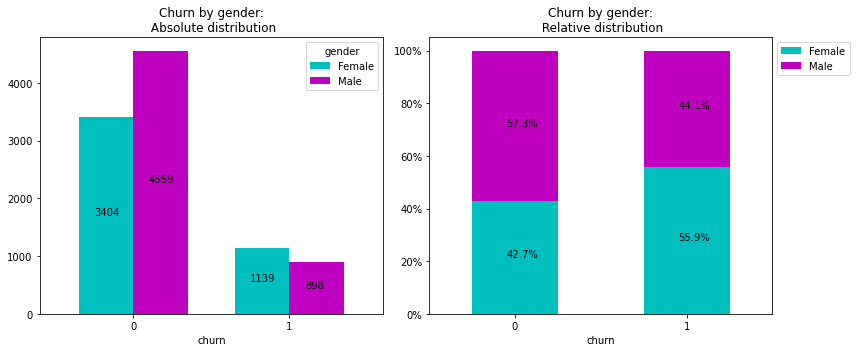

In [11]:
#Churn by gender
fig = plt.figure(figsize=(12, 5))

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['churn', 'gender'])['gender'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7, color=['c', 'm'])
plt.title('Churn by gender:\n Absolute distribution') 

#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + 0.1, p.get_height()/2))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['churn','gender'])['gender'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca(),color=['c', 'm'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Churn by gender:\n Relative distribution') 

#plot bar labels
for p, q in zip(ax2.patches[0:2], ax2.patches[2:4]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x()+0.2, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x()+0.2, q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

In [12]:
#Looks like females are more likely to churn compared to male

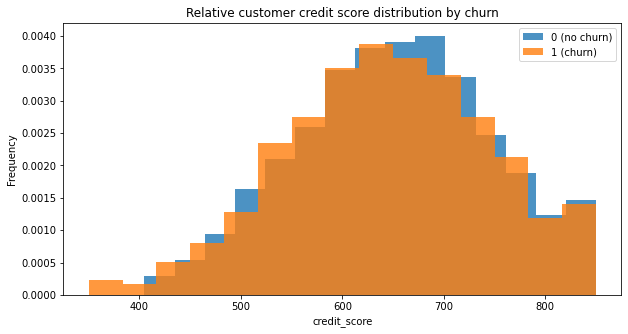

In [13]:
#Churn by Credit Score
ax = data['credit_score'].loc[data['churn'] == 0].plot.hist(bins=15, density = True, alpha=0.8, label='0 (no churn)', figsize = (10,5))
ax = data['credit_score'].loc[data['churn'] == 1].plot.hist(bins=15, density = True, alpha=0.8, label='1 (churn)', figsize = (10,5))
ax.set_xlabel('credit_score')
ax.set_title('Relative customer credit score distribution by churn')
ax.legend();

In [14]:
#Credit score below 400 ==> all churn

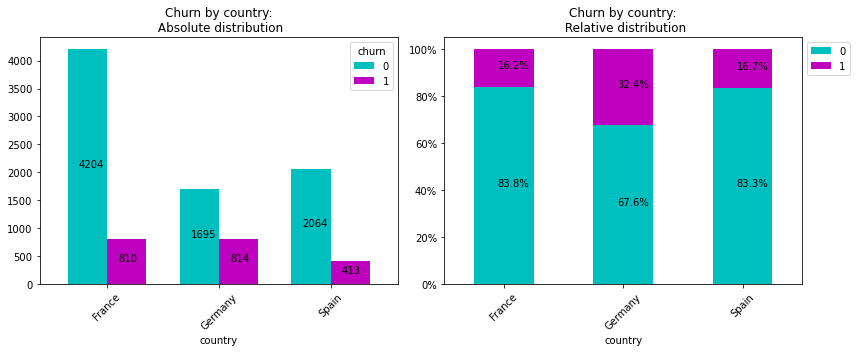

In [15]:
#Churn by country
fig = plt.figure(figsize=(12, 5))

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['country', 'churn'])['churn'].count().unstack().plot.bar(rot=45, ax=plt.gca(), width=0.7, color=['c','m'])
plt.title('Churn by country:\n Absolute distribution') 

#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + 0.1, p.get_height() /2))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['country','churn'])['churn'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=45, ax=plt.gca(),color=['c','m'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Churn by country:\n Relative distribution') 

#plot bar labels
for p, q in zip(ax2.patches[0:3], ax2.patches[3:6]):
    ax2.annotate(str(round(p.get_height(),1))+'%', (p.get_x()+0.2, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1))+'%', (q.get_x()+0.2, q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

In [16]:
#Germany seems more likely to churn compared to France and Spain

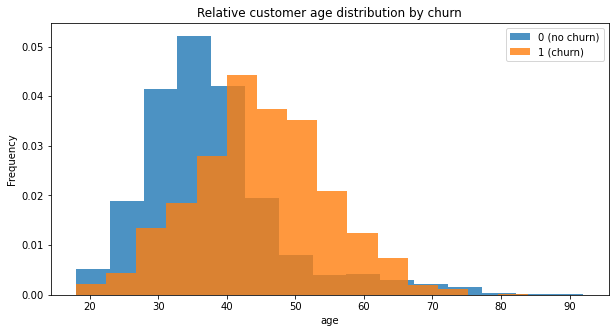

In [17]:
#Churn by Age
ax = data['age'].loc[data['churn'] == 0].plot.hist(bins=15, density = True, alpha=0.8, label='0 (no churn)', figsize = (10,5))
ax = data['age'].loc[data['churn'] == 1].plot.hist(bins=15, density = True, alpha=0.8, label='1 (churn)', figsize = (10,5))
ax.set_xlabel('age')
ax.set_title('Relative customer age distribution by churn')
ax.legend();

In [18]:
#Customer over 40 seems more likely to churn

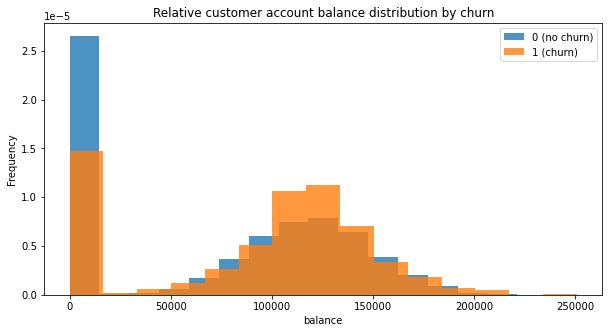

In [19]:
#Churn by Account Balance Information
ax = data['balance'].loc[data['churn'] == 0].plot.hist(bins=15, density = True, alpha=0.8, label='0 (no churn)', figsize = (10,5))
ax = data['balance'].loc[data['churn'] == 1].plot.hist(bins=15, density = True, alpha=0.8, label='1 (churn)', figsize = (10,5))
ax.set_xlabel('balance')
ax.set_title('Relative customer account balance distribution by churn')
ax.legend();

In [20]:
#Lower account balance seems to churn less

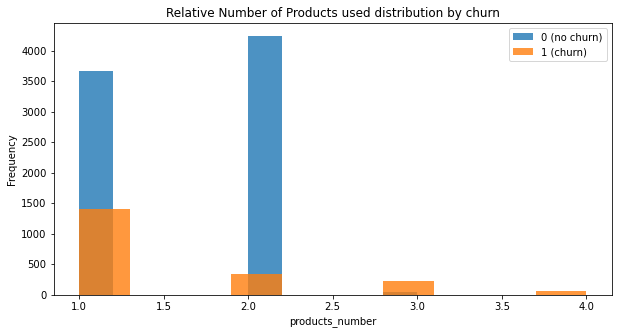

In [21]:
#Churn by Number of Products used from the bank
ax = data['products_number'].loc[data['churn'] == 0].plot.hist(density = False, alpha=0.8, label='0 (no churn)', figsize = (10,5))
ax = data['products_number'].loc[data['churn'] == 1].plot.hist(density = False, alpha=0.8, label='1 (churn)', figsize = (10,5))
ax.set_xlabel('products_number')
ax.set_title('Relative Number of Products used distribution by churn')
ax.legend();

In [22]:
#Hard to inteprete

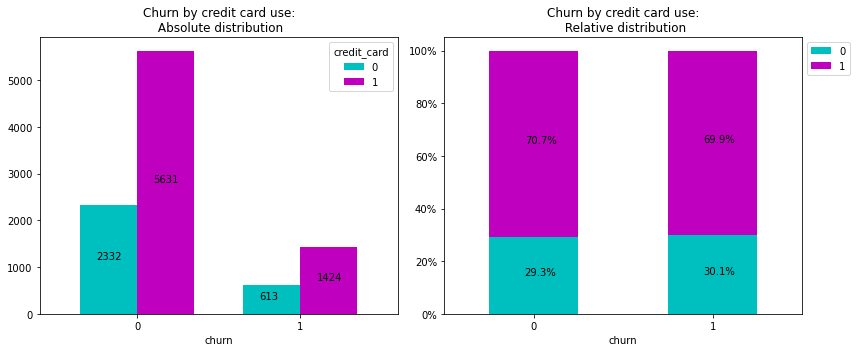

In [23]:
#Churn by credit card use
fig = plt.figure(figsize=(12, 5))

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['churn', 'credit_card'])['credit_card'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7, color=['c', 'm'])
plt.title('Churn by credit card use:\n Absolute distribution') 

#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + 0.1, p.get_height()/2))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['churn','credit_card'])['credit_card'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca(),color=['c', 'm'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Churn by credit card use:\n Relative distribution') 

#plot bar labels
for p, q in zip(ax2.patches[0:2], ax2.patches[2:4]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x()+0.2, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x()+0.2, q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

In [24]:
#Quite equal distribution, doesn't say much

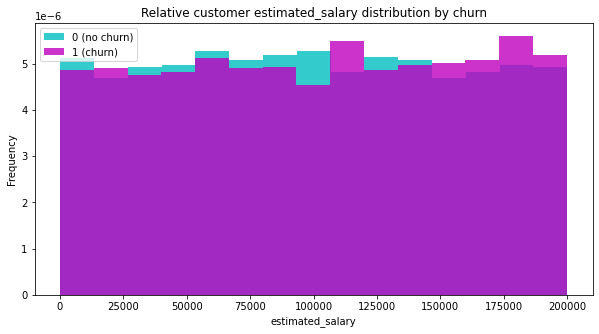

In [25]:
#Churn by Estimated Salary
ax = data['estimated_salary'].loc[data['churn'] == 0].plot.hist(bins=15, density = True, alpha=0.8, label='0 (no churn)', figsize = (10,5), color='c')
ax = data['estimated_salary'].loc[data['churn'] == 1].plot.hist(bins=15, density = True, alpha=0.8, label='1 (churn)', figsize = (10,5), color='m')
ax.set_xlabel('estimated_salary')
ax.set_title('Relative customer estimated_salary distribution by churn')
ax.legend();

In [26]:
#Quite equal distribution, doesn't say much

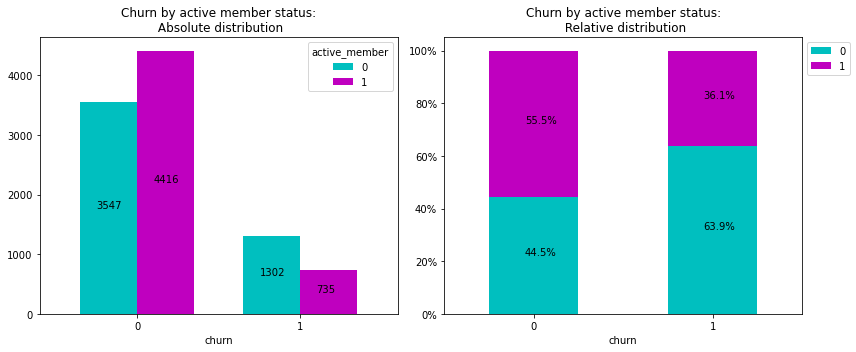

In [27]:
#Churn by active member status
fig = plt.figure(figsize=(12, 5))

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['churn', 'active_member'])['active_member'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7,color=['c', 'm'])
plt.title('Churn by active member status:\n Absolute distribution') 

#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + 0.1, p.get_height()/2))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['churn','active_member'])['active_member'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca(),color=['c', 'm'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Churn by active member status:\n Relative distribution') 

#plot bar labels
for p, q in zip(ax2.patches[0:2], ax2.patches[2:4]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x()+0.2, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x()+0.2, q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

In [28]:
#Active member ==> less likely to churn

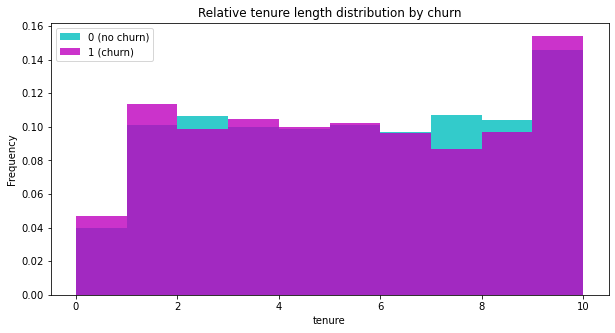

In [29]:
#Churn by Tenure
ax = data['tenure'].loc[data['churn'] == 0].plot.hist(density = True, alpha=0.8, label='0 (no churn)', figsize = (10,5), color='c')
ax = data['tenure'].loc[data['churn'] == 1].plot.hist(density = True, alpha=0.8, label='1 (churn)', figsize = (10,5), color='m')
ax.set_xlabel('tenure')
ax.set_title('Relative tenure length distribution by churn')
ax.legend();

In [30]:
#Doesn't say much

In [31]:
#Overall, we can see the the following factors affect likelihood of churn: gender, country, age, active_member, balance

In [32]:
#Data Preprocessing

data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
#Choose columns that affect churn rate
X,y = data[['age', 'balance', 'active_member','tenure','credit_card', 'estimated_salary', 'gender', 'country', 'products_number','credit_score']], data['churn']
X.head()




,age,balance,active_member,tenure,credit_card,estimated_salary,gender,country,products_number,credit_score
0,42,0.00,1,2,1,101348.88,Female,France,1,619
1,41,83807.86,1,1,0,112542.58,Female,Spain,1,608
2,42,159660.80,0,8,1,113931.57,Female,France,3,502
3,39,0.00,0,1,0,93826.63,Female,France,2,699
4,43,125510.82,1,2,1,79084.10,Female,Spain,1,850


In [34]:
#Get dummies for categorical variables

X = pd.get_dummies(X, 
                   columns=['gender','country','products_number'],
                   prefix =['gender','country','products_number'],
                   drop_first=False)
X.head().style

,age,balance,active_member,tenure,credit_card,estimated_salary,credit_score,gender_Female,gender_Male,country_France,country_Germany,country_Spain,products_number_1,products_number_2,products_number_3,products_number_4
0,42,0.000000,1,2,1,101348.880000,619,1,0,1,0,0,1,0,0,0
1,41,83807.860000,1,1,0,112542.580000,608,1,0,0,0,1,1,0,0,0
2,42,159660.800000,0,8,1,113931.570000,502,1,0,1,0,0,0,0,1,0
3,39,0.000000,0,1,0,93826.630000,699,1,0,1,0,0,0,1,0,0
4,43,125510.820000,1,2,1,79084.100000,850,1,0,0,0,1,1,0,0,0


In [35]:
##Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2022) #split data 70:30






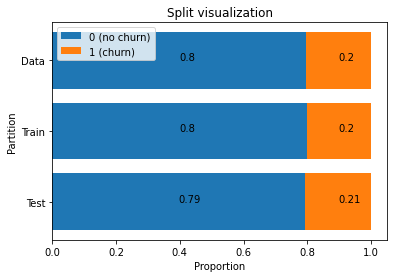

In [36]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = y.value_counts() / len(y)

fig, ax = plt.subplots()

ax.barh(['Test','Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='0 (no churn)')
ax.barh(['Test','Train','Data'], [test_dist[1], train_dist[1], data_dist[1]], left=[test_dist[0], train_dist[0], data_dist[0]], color='#ff7f0e', label='1 (churn)')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['Test', 'Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], [test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

In [47]:
#Build a Decision Model Tree on Imbalanced data

from sklearn import tree

#Define decision tree classifier
clf1 = tree.DecisionTreeClassifier(criterion='gini', random_state=2022,
                                 max_depth=3, min_samples_leaf=3)

#Fit the training data
clf1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=2022)

In [48]:
# Use classifier to predict labels
y_pred = clf1.predict(X_test)

print('Accuracy is: ', (accuracy_score(y_test, y_pred)*100).round(2))
#Probabilities
y_pred_probs = clf1.predict_proba(X_test).round(2)
y_pred_probs

Accuraccy is:  84.3


array([[0.96, 0.04],
       [0.96, 0.04],
       [0.83, 0.17],
       ...,
       [0.12, 0.88],
       [0.9 , 0.1 ],
       [0.71, 0.29]])

Fontconfig error: Cannot load default config file: No such file: (null)



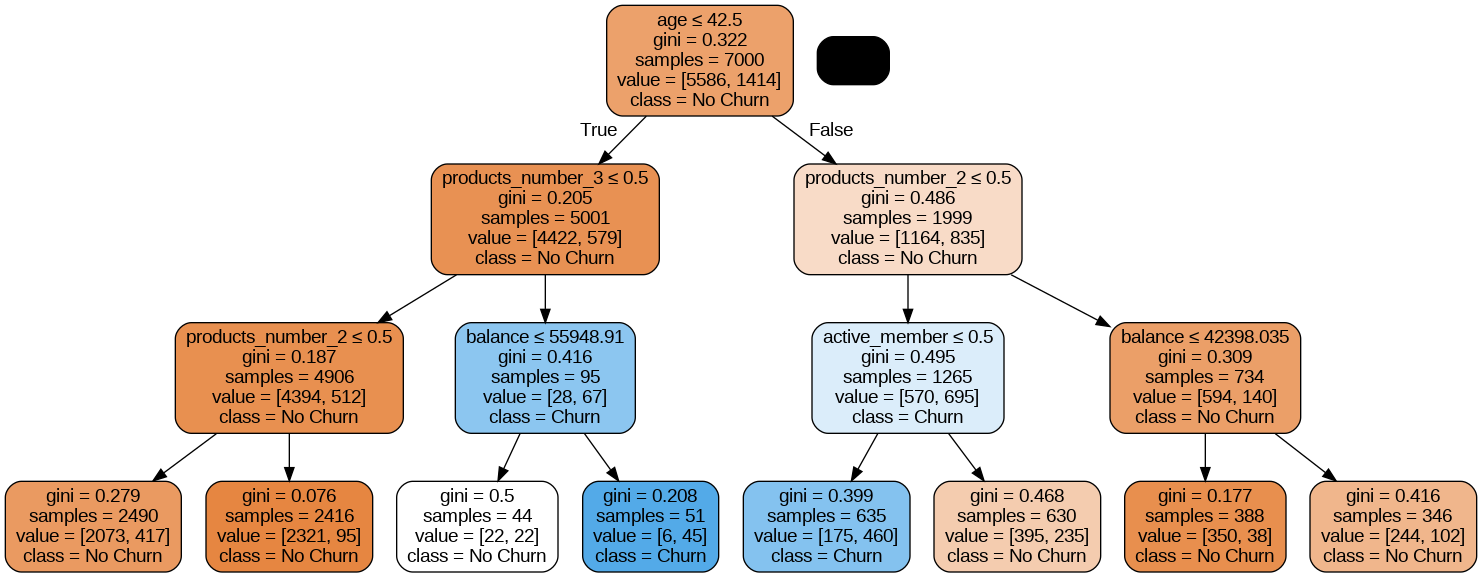

In [39]:
#Decision Tree Plot
import pydotplus
from IPython.display import Image
import matplotlib.image as mpimg
import io


#Create DOT data
dot_data1 = tree.export_graphviz(clf1, out_file=None,
                               feature_names = X_train.columns,
                               class_names = ['No Churn', 'Churn'], filled=True,
                                rounded=True,
                                special_characters=True)

#Draw graph
graph = pydotplus.graph_from_dot_data(dot_data1)

#show graph
Image(graph.create_png())

In [62]:
#Rebalancing with SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [63]:
def plot_2d_space(X, y, label='Classes', title='x', xlabel='x', ylabel='y'):
    colors = ['#FF7F0E', '#1f77b4']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l,0],
            X[y==l,1],
            c=c, label=l, marker=m, s=2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper right')

Original label Counter({0: 5586, 1: 1414})
SMOTE label Counter({1: 5586, 0: 5586})


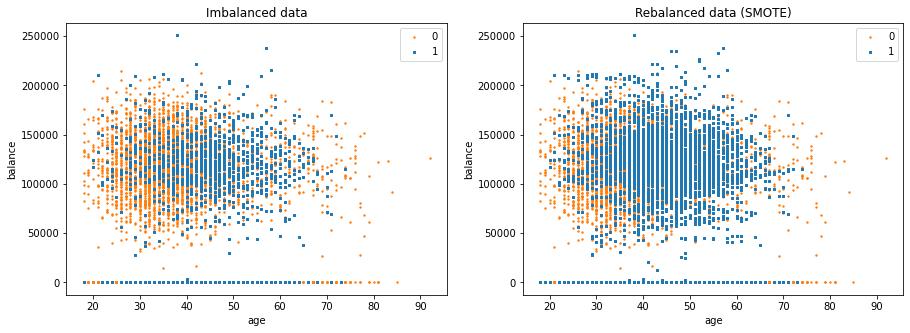

In [64]:
print('Original label %s' % Counter(y_train))
print('SMOTE label %s' % Counter(y_sm))

fig = plt.figure(figsize=(15, 5))

ax0 = plt.subplot(121)
ax0 = plot_2d_space(np.array(X_train), y_train, title='Imbalanced data', xlabel='age', ylabel='balance')

ax1 = plt.subplot(122)
ax1 = plot_2d_space(np.array(X_sm), y_sm, title='Rebalanced data (SMOTE)', xlabel='age', ylabel='balance')

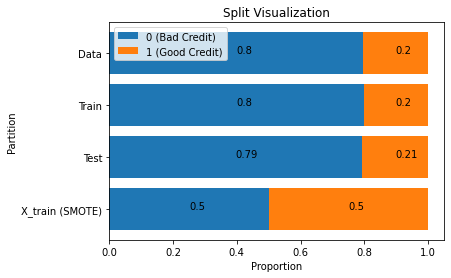

In [65]:
train_dist = y_train.value_counts() / len(y_train) #Normalized absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = y.value_counts() / len(y)
smote_dist = pd.Series(y_sm).value_counts() / len(pd.Series(y_sm))

fig, ax = plt.subplots()
ax.barh(['X_train (SMOTE)', 'Test', 'Train', 'Data'],[smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='0 (Bad Credit)')
ax.barh(['X_train (SMOTE)', 'Test', 'Train', 'Data'],[smote_dist[1], test_dist[1], train_dist[1], data_dist[1]], left=[smote_dist[0], test_dist[0], train_dist[0], data_dist[0]],color='#ff7f0e', label='1 (Good Credit)')
ax.set_title('Split Visualization')
ax.legend(loc='best')
plt.xlabel('Proportion')
plt.ylabel('Partition')


#plot bar values
for part, a, b in zip(['X_train (SMOTE)', 'Test', 'Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));


In [66]:
#Define decision tree classifier
clf2 = tree.DecisionTreeClassifier(criterion='gini', random_state=2022,
                                 max_depth=3, min_samples_leaf=3)

#Fit the training data
clf2.fit(X_sm, y_sm)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=2022)

In [67]:
#Use classifier to predict labels
y_pred_sm = clf2.predict(X_test)
y_pred_prob = clf2.predict_proba(X_test).round(2)
print('Accuracy is: ', (accuracy_score(y_test, y_pred_sm)*100).round(2))


Accuraccy is:  78.33


Fontconfig error: Cannot load default config file: No such file: (null)



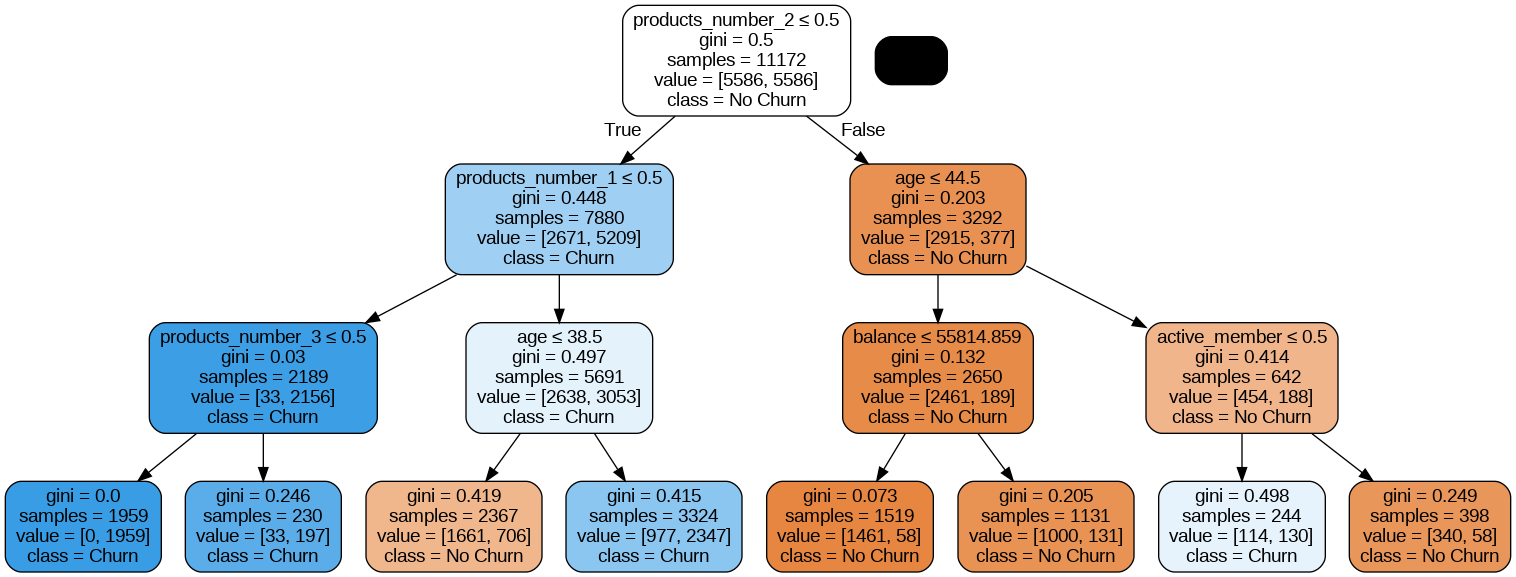

In [68]:
#Create DOT data
dot_data2 = tree.export_graphviz(clf2, out_file=None,
                               feature_names = X_sm.columns,
                               class_names = ['No Churn', 'Churn'],filled=True,
                                rounded=True,
                                special_characters=True)

#Draw graph
graph = pydotplus.graph_from_dot_data(dot_data2)

#show graph
Image(graph.create_png())

In [180]:
#LOGISTIC REGRESSION

#Logistic Regression on imbalanced data

lr_imb = LogisticRegression(random_state=2022).fit(X_train, y_train) #define Logistic Regression classifier

In [181]:
y_pred_lr_imb = lr_imb.predict(X_test)
y_predProba_lr_imb = lr_imb.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_lr_imb)*100).round(2))

Accuracy is:  78.7


In [182]:
#Logistic Regression on balanced data
lr_bal = LogisticRegression(random_state=2022).fit(X_sm, y_sm) #define Logistic Regression classifier

In [183]:
y_pred_lr_bal = lr_bal.predict(X_test)
y_predProba_lr_bal = lr_bal.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_lr_bal)*100).round(2))

Accuracy is:  64.6


In [184]:
##SVM

svm_imb = SVC(probability=True).fit(X_train, y_train)

In [185]:
y_pred_svm_imb = svm_imb.predict(X_test)
y_predProba_svm_imb = svm_imb.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_svm_imb)*100).round(2))

Accuracy is:  79.23


In [186]:
svm_bal = SVC(probability=True).fit(X_sm, y_sm)

In [187]:
y_pred_svm_bal = svm_bal.predict(X_test)
y_predProba_svm_bal = svm_bal.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_svm_bal)*100).round(2))

Accuracy is:  47.23


In [188]:
##MODEL EVALUATION

In [189]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

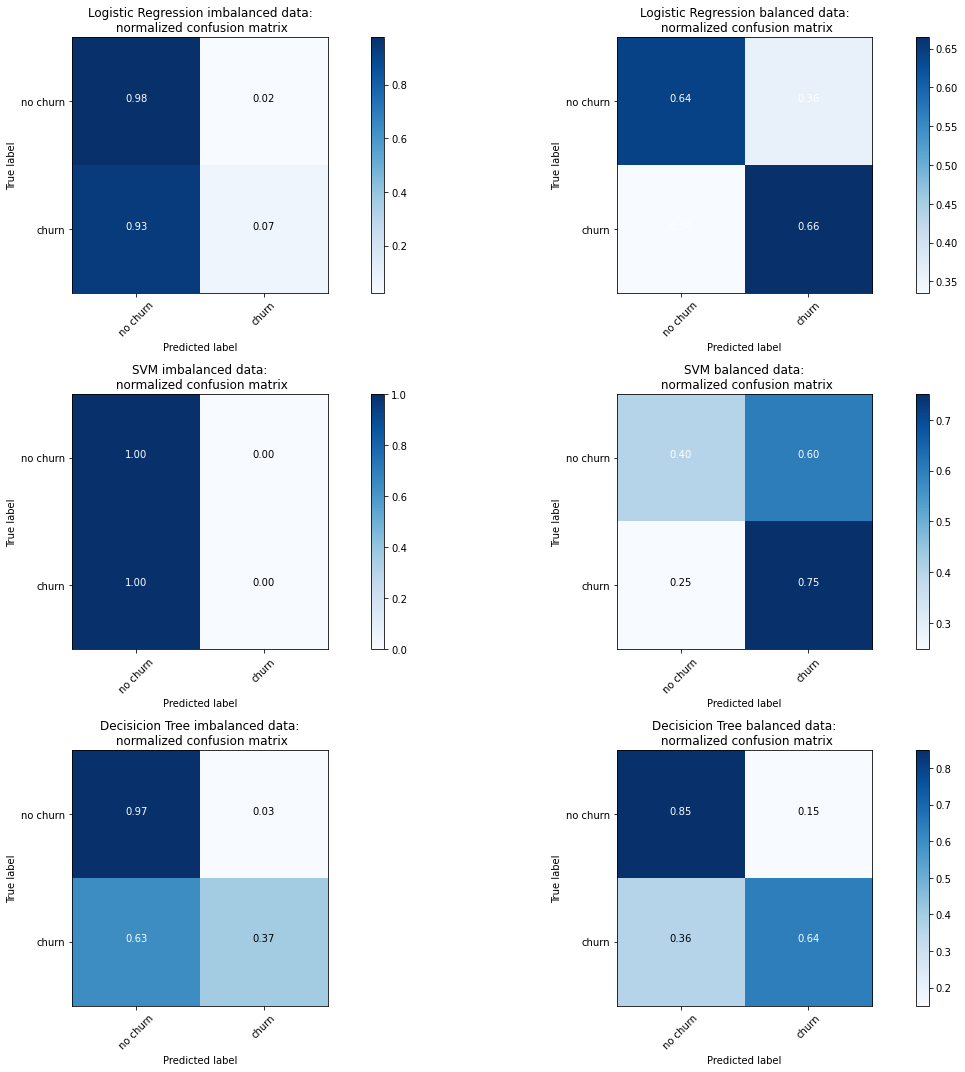

In [190]:
# Compute confusion matrix
class_names = ['no churn', 'churn']
cnf_matrix_lr_imb = confusion_matrix(y_test, y_pred_lr_imb)
cnf_matrix_lr_bal = confusion_matrix(y_test, y_pred_lr_bal)
cnf_matrix_svm_imb = confusion_matrix(y_test, y_pred_svm_imb)
cnf_matrix_svm_bal = confusion_matrix(y_test, y_pred_svm_bal)
cnf_matrix_dt_imb = confusion_matrix(y_test, y_pred)
cnf_matrix_dt_bal = confusion_matrix(y_test, y_pred_sm)

np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))

#Plot Logistic Regression (imbalanced) normalized confusion matrix
plt.subplot(321) 
plot_confusion_matrix(cnf_matrix_lr_imb, classes=class_names, normalize=True,
                      title='Logistic Regression imbalanced data:\n normalized confusion matrix')


#Plot Logistic Regression (balanced) normalized confusion matrix
plt.subplot(322) 
plot_confusion_matrix(cnf_matrix_lr_bal, classes=class_names, normalize=True,
                      title='Logistic Regression balanced data:\n normalized confusion matrix')

#Plot SVM imbalanced normalized confusion matrix
plt.subplot(323) 
plot_confusion_matrix(cnf_matrix_svm_imb, classes=class_names,normalize=True,
                      title='SVM imbalanced data:\n normalized confusion matrix')

#Plot SVM balanced normalized confusion matrix
plt.subplot(324) 
plot_confusion_matrix(cnf_matrix_svm_bal, classes=class_names,normalize=True,
                      title='SVM balanced data:\n normalized confusion matrix')

#Plot Decision Tree balanced normalized confusion matrix
plt.subplot(325) 
plot_confusion_matrix(cnf_matrix_dt_imb, classes=class_names,normalize=True,
                      title='Decisicion Tree imbalanced data:\n normalized confusion matrix')


#Plot Decision Tree balanced normalized confusion matrix
plt.subplot(326) 
plot_confusion_matrix(cnf_matrix_dt_bal, classes=class_names,normalize=True,
                      title='Decisicion Tree balanced data:\n normalized confusion matrix')

plt.show()

In [191]:
##We can see that the decision tree model on balance data is the best!

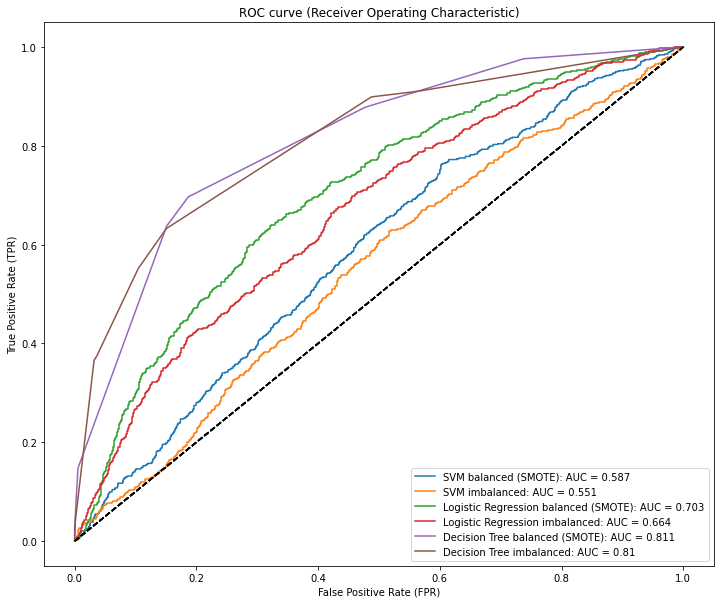

In [192]:
plt.figure(figsize=(12,10))

for test, pred, name in zip([y_test, y_test, y_test, y_test, y_test,y_test ], [y_predProba_svm_bal[:,1],y_predProba_svm_imb[:,1], y_predProba_lr_bal[:,1],y_predProba_lr_imb[:,1], y_pred_prob[:,1],y_pred_probs[:,1] ], ['SVM balanced (SMOTE)','SVM imbalanced', 'Logistic Regression balanced (SMOTE)','Logistic Regression imbalanced','Decision Tree balanced (SMOTE)','Decision Tree imbalanced']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()

In [193]:
##Fine tuning max_depth value for Decision Tree
#First we do it for unbalanced dataset

In [194]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 17))

# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = tree.DecisionTreeClassifier(max_depth = depth, 
                             random_state = 2022)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)


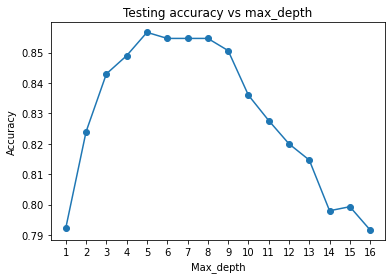

In [195]:
fig, ax = plt.subplots()

# Plot Accuracy score against the max_depth
ax.plot(max_depth_range, accuracy, marker = "o")

# Customize the x-axis label
ax.set_xlabel("Max_depth")
plt.xticks(max_depth_range)

# Customize the y-axis label
ax.set_ylabel("Accuracy")

#Set title
ax.set_title('Testing accuracy vs max_depth')

# Call the show function
plt.show()

In [196]:
model_score_train = []
model_score_test = []

for max_d in range(1,17):
  model = tree.DecisionTreeClassifier(max_depth=max_d, random_state=2022)
  model.fit(X_train, y_train)
  print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(X_train, y_train))
  print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(X_test,y_test))
  model_score_train.append(model.score(X_train, y_train))
  model_score_test.append(model.score(X_test, y_test))
  print('')


The Training Accuracy for max_depth 1 is: 0.798
The Validation Accuracy for max_depth 1 is: 0.7923333333333333

The Training Accuracy for max_depth 2 is: 0.8214285714285714
The Validation Accuracy for max_depth 2 is: 0.824

The Training Accuracy for max_depth 3 is: 0.8442857142857143
The Validation Accuracy for max_depth 3 is: 0.843

The Training Accuracy for max_depth 4 is: 0.8522857142857143
The Validation Accuracy for max_depth 4 is: 0.849

The Training Accuracy for max_depth 5 is: 0.8581428571428571
The Validation Accuracy for max_depth 5 is: 0.8566666666666667

The Training Accuracy for max_depth 6 is: 0.868
The Validation Accuracy for max_depth 6 is: 0.8546666666666667

The Training Accuracy for max_depth 7 is: 0.8742857142857143
The Validation Accuracy for max_depth 7 is: 0.8546666666666667

The Training Accuracy for max_depth 8 is: 0.8845714285714286
The Validation Accuracy for max_depth 8 is: 0.8546666666666667

The Training Accuracy for max_depth 9 is: 0.8934285714285715
The 

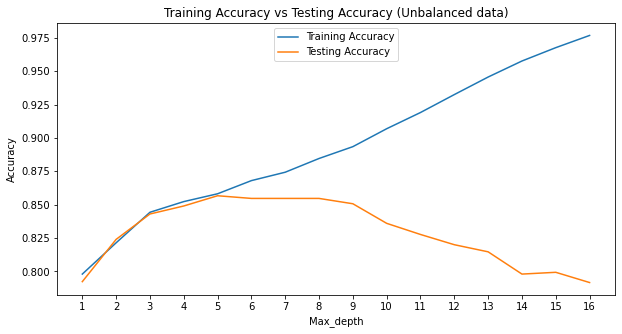

In [197]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

#Figure size
fig.set_figheight(5)
fig.set_figwidth(10)

# Plot Accuracy of training models against the max_depth
ax.plot(max_depth_range, model_score_train, label = "Training Accuracy")

# Plot Accuracy of testing models against the max_depth
ax.plot(max_depth_range, model_score_test, label = "Testing Accuracy")

#Customize line labels
leg = plt.legend(loc='upper center')

# Customize the x-axis label
ax.set_xlabel("Max_depth")
plt.xticks(max_depth_range)

# Customize the y-axis label
ax.set_ylabel("Accuracy")

#Set title
ax.set_title('Training Accuracy vs Testing Accuracy (Unbalanced data)')

# Call the show function
plt.show()

In [198]:
##Do the same thing for balanced dataset
# List of values to try for max_depth:
max_depth_range = list(range(1, 17))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = tree.DecisionTreeClassifier(max_depth = depth, 
                             random_state = 2022)
    clf.fit(X_sm, y_sm)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

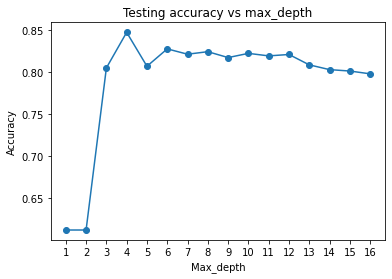

In [199]:
fig, ax = plt.subplots()

# Plot Accuracy score against the max_depth
ax.plot(max_depth_range, accuracy, marker = "o")

# Customize the x-axis label
ax.set_xlabel("Max_depth")
plt.xticks(max_depth_range)

# Customize the y-axis label
ax.set_ylabel("Accuracy")

#Set title
ax.set_title('Testing accuracy vs max_depth')

# Call the show function
plt.show()

In [200]:
model_score_train = []
model_score_test = []

for max_d in range(1,17):
  model = tree.DecisionTreeClassifier(max_depth=max_d, random_state=2022)
  model.fit(X_sm, y_sm)
  print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(X_sm, y_sm))
  print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(X_test,y_test))
  model_score_train.append(model.score(X_sm, y_sm))
  model_score_test.append(model.score(X_test, y_test))
  print('')


The Training Accuracy for max_depth 1 is: 0.7284282133906194
The Validation Accuracy for max_depth 1 is: 0.6123333333333333

The Training Accuracy for max_depth 2 is: 0.7284282133906194
The Validation Accuracy for max_depth 2 is: 0.6123333333333333

The Training Accuracy for max_depth 3 is: 0.8151629072681704
The Validation Accuracy for max_depth 3 is: 0.805

The Training Accuracy for max_depth 4 is: 0.835123523093448
The Validation Accuracy for max_depth 4 is: 0.8473333333333334

The Training Accuracy for max_depth 5 is: 0.850608664518439
The Validation Accuracy for max_depth 5 is: 0.807

The Training Accuracy for max_depth 6 is: 0.873344074471894
The Validation Accuracy for max_depth 6 is: 0.8276666666666667

The Training Accuracy for max_depth 7 is: 0.8795202291442893
The Validation Accuracy for max_depth 7 is: 0.8213333333333334

The Training Accuracy for max_depth 8 is: 0.8924095954171142
The Validation Accuracy for max_depth 8 is: 0.8243333333333334

The Training Accuracy for max

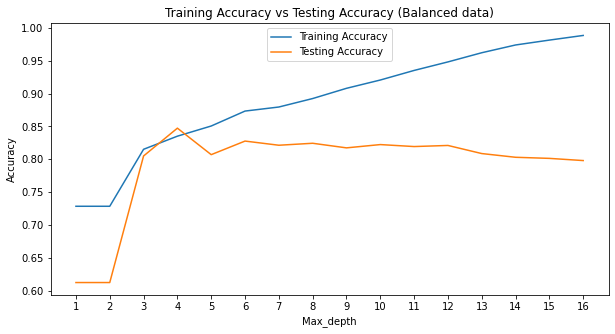

In [201]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

#Figure size
fig.set_figheight(5)
fig.set_figwidth(10)

# Plot Accuracy of training models against the max_depth
ax.plot(max_depth_range, model_score_train, label = "Training Accuracy")

# Plot Accuracy of testing models against the max_depth
ax.plot(max_depth_range, model_score_test, label = "Testing Accuracy")

#Customize line labels
leg = plt.legend(loc='upper center')

# Customize the x-axis label
ax.set_xlabel("Max_depth")
plt.xticks(max_depth_range)

# Customize the y-axis label
ax.set_ylabel("Accuracy")

#Set title
ax.set_title('Training Accuracy vs Testing Accuracy (Balanced data)')

# Call the show function
plt.show()

In [202]:
#We can conclude that with unbalanced data, max_depth = 5 give the most accurate model. The number for balanced dataset is 4.
#Apply the tuned parameters into the Decision Tree Models and re-evaluate

In [70]:
#Build a Decision Model Tree on Imbalanced data
#Define decision tree classifier
clf3 = tree.DecisionTreeClassifier(criterion='gini', random_state=2022,
                                 max_depth=5, min_samples_leaf=3)

#Fit the training data
clf3.fit(X_train, y_train)

#Use classifier to predict labels
y_pred_tuned = clf3.predict(X_test)
print('Accuracy is: ', (accuracy_score(y_test, y_pred_tuned)*100).round(2))

#Probabilities
y_pred_probs_tuned = clf3.predict_proba(X_test).round(2)
y_pred_probs_tuned

Accuracy is:  85.67


array([[0.98, 0.02],
       [0.93, 0.07],
       [0.88, 0.12],
       ...,
       [0.05, 0.95],
       [0.96, 0.04],
       [0.73, 0.27]])

Fontconfig error: Cannot load default config file: No such file: (null)



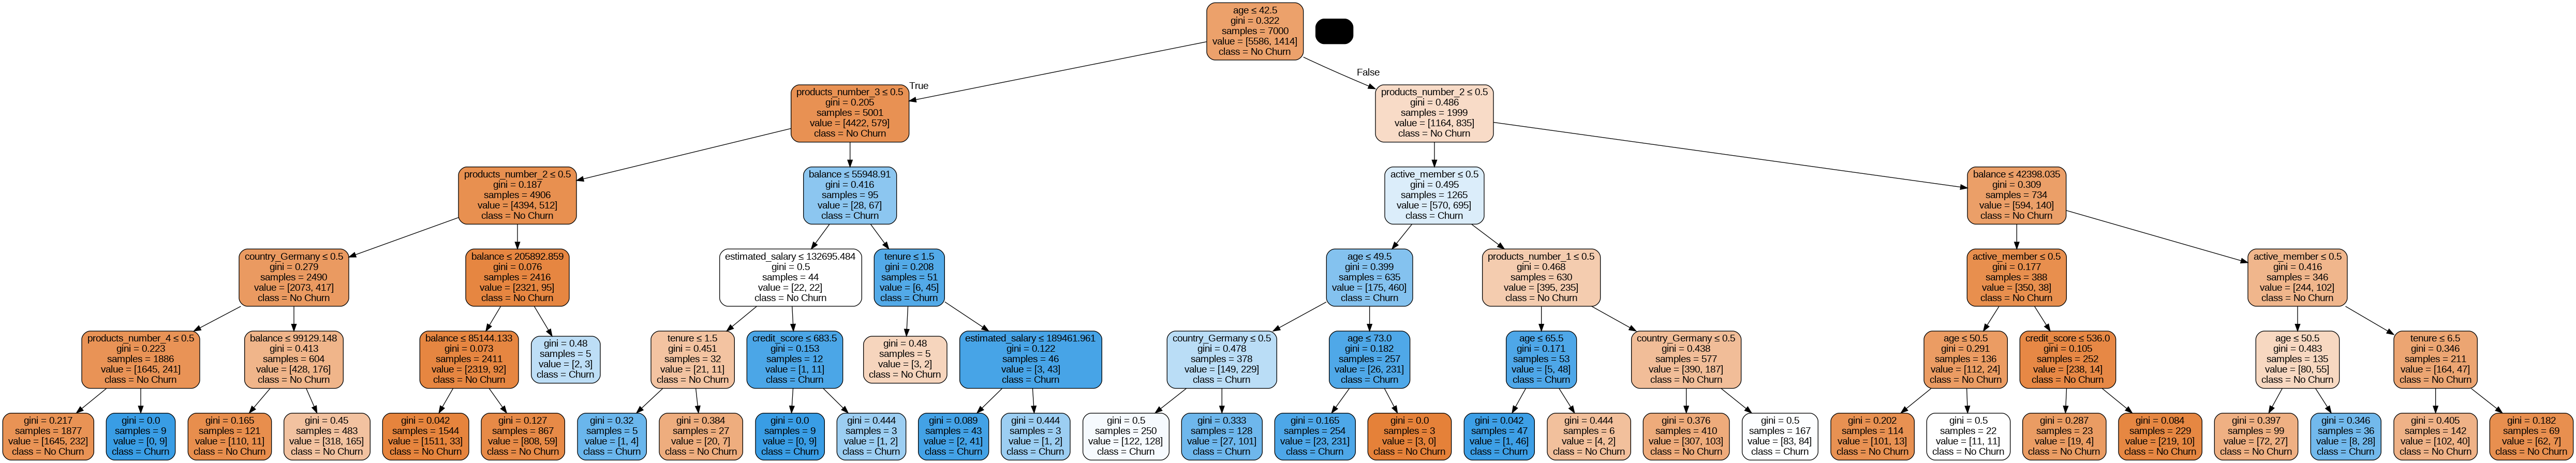

In [71]:
#Create DOT data
dot_data3 = tree.export_graphviz(clf3, out_file=None,
                               feature_names = X_train.columns,
                               class_names = ['No Churn', 'Churn'], filled=True,
                                rounded=True,
                                special_characters=True)

#Draw graph
graph = pydotplus.graph_from_dot_data(dot_data3)

#show graph
Image(graph.create_png())

In [72]:
#Define decision tree classifier
clf4 = tree.DecisionTreeClassifier(criterion='gini', random_state=2022,
                                 max_depth=4, min_samples_leaf=3)

#Fit the training data
clf4.fit(X_sm, y_sm)

#Use classifier to predict labels
y_pred_sm_tuned = clf4.predict(X_test)
y_pred_prob_tuned = clf4.predict_proba(X_test).round(2)
print('Accuracy is: ', (accuracy_score(y_test, y_pred_sm_tuned)*100).round(2))


Accuracy is:  84.1


Fontconfig error: Cannot load default config file: No such file: (null)



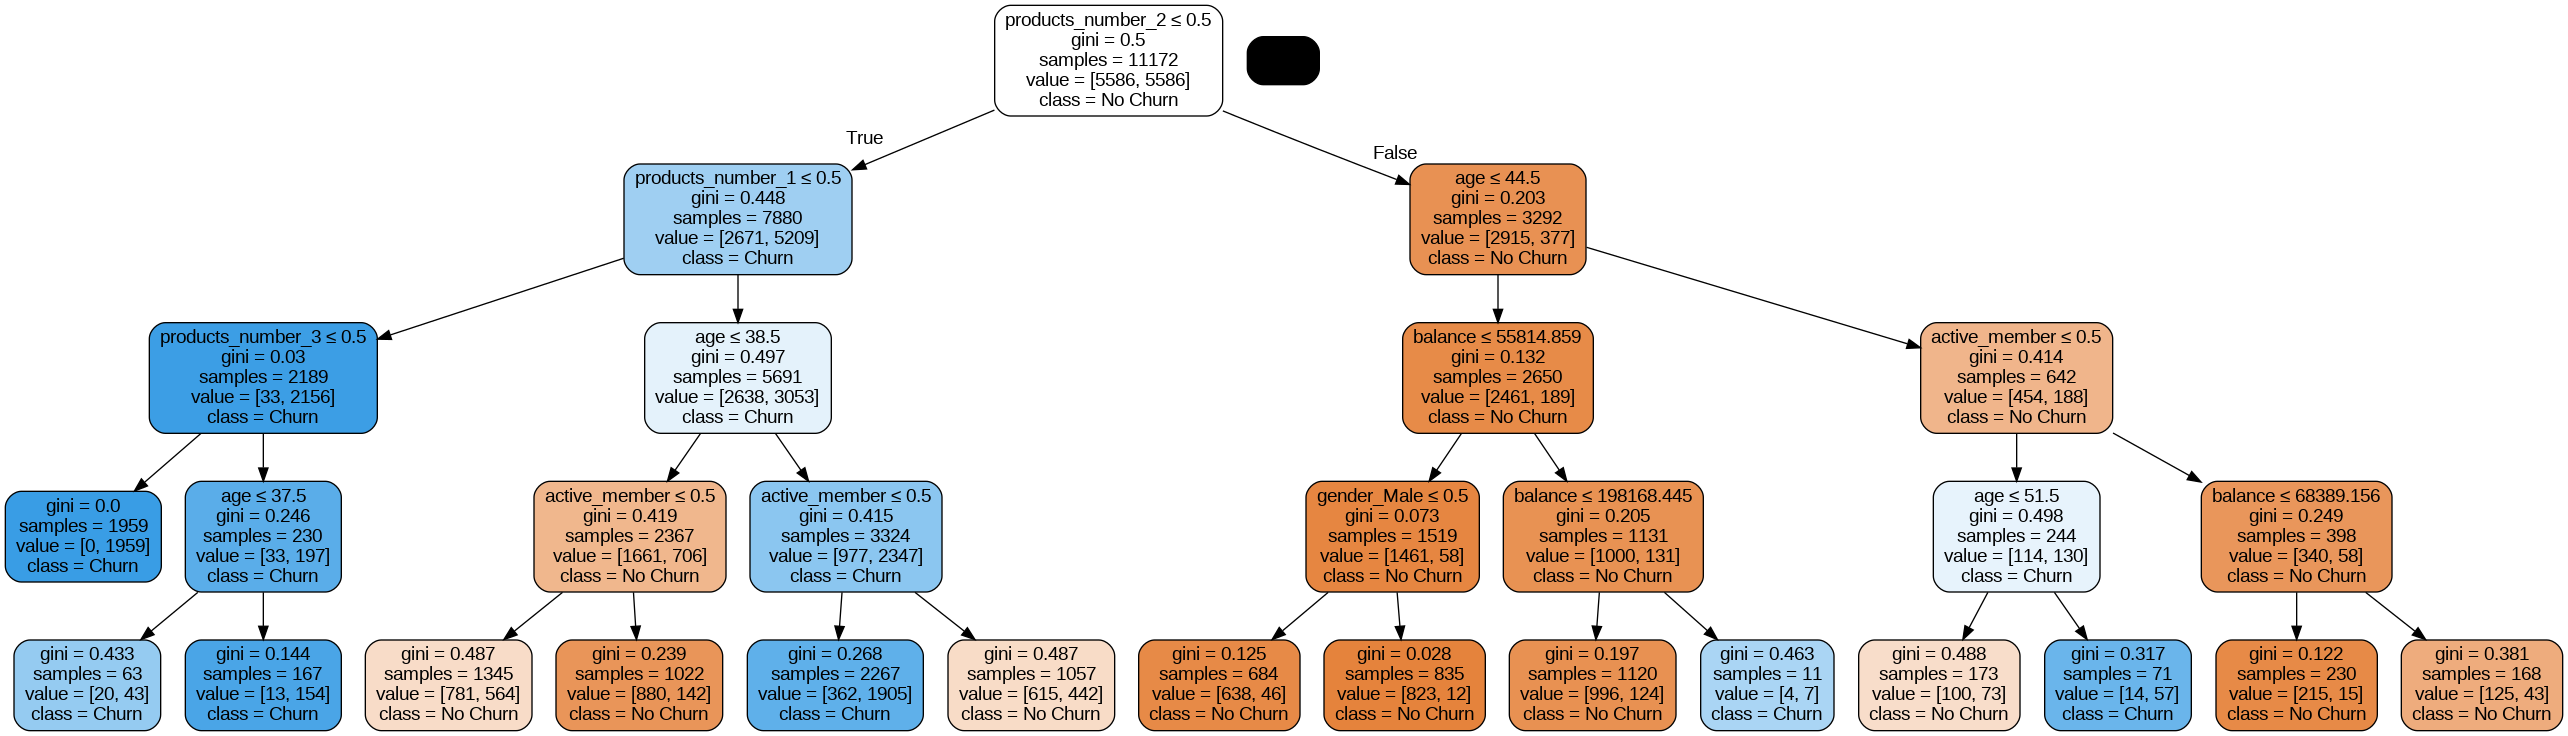

In [73]:
#Create DOT data
dot_data4 = tree.export_graphviz(clf4, out_file=None,
                               feature_names = X_sm.columns,
                               class_names = ['No Churn', 'Churn'],filled=True,
                                rounded=True,
                                special_characters=True)

#Draw graph
graph = pydotplus.graph_from_dot_data(dot_data4)

#show graph
Image(graph.create_png())

In [207]:
##MODEL REEVALUATION

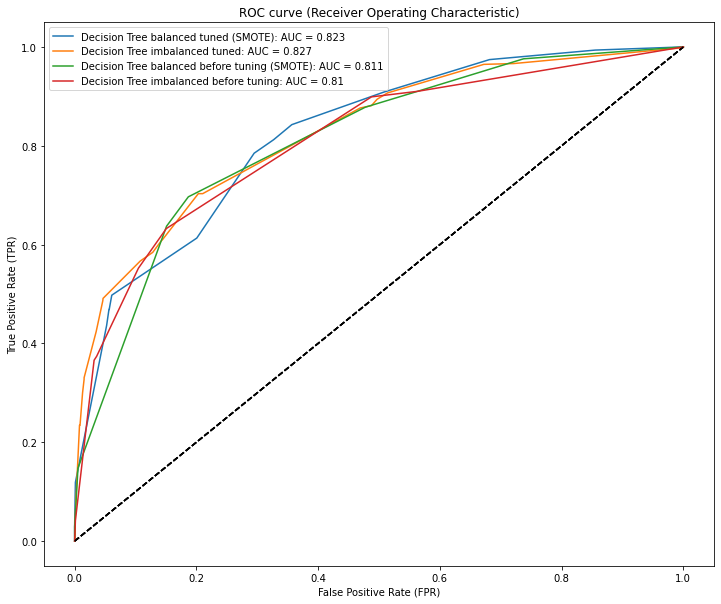

In [208]:
plt.figure(figsize=(12,10))

for test, pred, name in zip([y_test, y_test, y_test, y_test], [y_pred_prob_tuned[:,1],y_pred_probs_tuned[:,1],y_pred_prob[:,1],y_pred_probs[:,1] ], ['Decision Tree balanced tuned (SMOTE)','Decision Tree imbalanced tuned','Decision Tree balanced before tuning (SMOTE)','Decision Tree imbalanced before tuning']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()